#COMP550 Final Project

In [ ]:
!pip install nltk
!pip install textblob
!pip install textblob-fr
!pip install gensim
!pip install pytorch-crf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.2/561.2 kB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Dataset

In [ ]:
!pip install openpyxl

In [ ]:
df = pd.read_excel('/content/data.xlsx')
df = df.rename(columns={'review content': 'review_content'})
lemmatizer = WordNetLemmatizer()


In [ ]:
df

reviewId  \
0      f7b53a86-a02a-4dcc-b03e-5d16c3436ce8   
1      c422fc8c-2398-41e7-bcf2-6a782de21138   
2      dc84000f-78d5-4952-ab37-9d995153bc50   
3      14c43882-3276-4fb4-b210-2e6fd7cb64f1   
4      990283d2-f675-4089-9198-b9d33c7819fe   
...                                     ...   
24991  02e95af1-fe41-4810-9b2d-b2369015df1f   
24992  9d11db13-adcd-479a-b0bc-5dc0ee80e500   
24993  f7b4569c-fd06-47f5-b35b-ad282fe04462   
24994  fe1e4120-0a62-4f1a-a3d3-cacffee1af95   
24995  15db1e25-a937-4c7a-b3a5-02c7a0296830   

                                          review_content  score  \
0                                                  great      5   
1                                          excellent app      4   
2      The best app I ever seen in my life he solve m...      5   
3                                                Great 🥰      5   
4                                                 nice 👍      5   
...                                                  ...    ...   
24991               très bon application pour les élèves      2   
24992                                   très intéressant      3   
24993                         cette application est cool      5   
24994                                             Banger      5   
24995                                                 ❤️      4   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                  0           1.2024.331  2024-12-06 19:11:57          NaN   
1                  0           1.2024.331  2024-12-06 19:09:55          NaN   
2                  0           1.2024.337  2024-12-06 19:08:18          NaN   
3                  0           1.2024.331  2024-12-06 19:04:50          NaN   
4                  0           1.2024.324  2024-12-06 19:03:43          NaN   
...              ...                  ...                  ...          ...   
24991              0           1.2024.317  2024-11-24 19:55:08          NaN   
24992              0           1.2024.310  2024-11-24 19:50:32          NaN   
24993              0           1.2024.268  2024-11-24 19:49:49          NaN   
24994              0           1.2024.310  2024-11-24 19:46:49          NaN   
24995              0           1.2024.317  2024-11-24 19:45:43          NaN   

      repliedAt  appVersion country Language  
0           NaN  1.2024.331  Canada  English  
1           NaN  1.2024.331  Canada  English  
2           NaN  1.2024.337  Canada  English  
3           NaN  1.2024.331  Canada  English  
4           NaN  1.2024.324  Canada  English  
...         ...         ...     ...      ...  
24991       NaN  1.2024.317  Canada   French  
24992       NaN  1.2024.310  Canada   French  
24993       NaN  1.2024.268  Canada   French  
24994       NaN  1.2024.310  Canada   French  
24995       NaN  1.2024.317  Canada   French  

[24996 rows x 11 columns]

1. Classify data according to the language (English, French, Italian)

In [ ]:
en_df = df[df['Language'] == 'English']
en_df

reviewId  \
0      f7b53a86-a02a-4dcc-b03e-5d16c3436ce8   
1      c422fc8c-2398-41e7-bcf2-6a782de21138   
2      dc84000f-78d5-4952-ab37-9d995153bc50   
3      14c43882-3276-4fb4-b210-2e6fd7cb64f1   
4      990283d2-f675-4089-9198-b9d33c7819fe   
...                                     ...   
19991  82af4495-5acd-4fb6-aba6-e070a017f735   
19992  8cb2ca94-244b-4643-83f1-5b39afa80d2b   
19993  27306412-9a57-4ca8-a4de-e516d1bd8cc4   
19994  238cee63-4f73-4344-a310-a82f50c7295c   
19995  524013f2-b5e5-42ae-be3a-1ab75af390b2   

                                          review_content  score  \
0                                                  great      5   
1                                          excellent app      4   
2      The best app I ever seen in my life he solve m...      5   
3                                                Great 🥰      5   
4                                                 nice 👍      5   
...                                                  ...    ...   
19991                                 An exceptional app      5   
19992                                               good      5   
19993                              I love this app 🫶❤️‍🩹      5   
19994                                      i.like it.👌🫴⏩      5   
19995                                               nice      4   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                  0           1.2024.331  2024-12-06 19:11:57          NaN   
1                  0           1.2024.331  2024-12-06 19:09:55          NaN   
2                  0           1.2024.337  2024-12-06 19:08:18          NaN   
3                  0           1.2024.331  2024-12-06 19:04:50          NaN   
4                  0           1.2024.324  2024-12-06 19:03:43          NaN   
...              ...                  ...                  ...          ...   
19991              0           1.2024.331  2024-12-03 14:11:13          NaN   
19992              0           1.2024.331  2024-12-03 14:10:51          NaN   
19993              0           1.2024.310  2024-12-03 14:09:42          NaN   
19994              0                  NaN  2024-12-03 14:09:34          NaN   
19995              0           1.2024.331  2024-12-03 14:09:12          NaN   

      repliedAt  appVersion country Language  
0           NaN  1.2024.331  Canada  English  
1           NaN  1.2024.331  Canada  English  
2           NaN  1.2024.337  Canada  English  
3           NaN  1.2024.331  Canada  English  
4           NaN  1.2024.324  Canada  English  
...         ...         ...     ...      ...  
19991       NaN  1.2024.331     USA  English  
19992       NaN  1.2024.331     USA  English  
19993       NaN  1.2024.310     USA  English  
19994       NaN         NaN     USA  English  
19995       NaN  1.2024.331     USA  English  

[9998 rows x 11 columns]

In [ ]:
fr_df =df[df['Language'] == 'French']
fr_df

reviewId  \
4999   8518fb10-5ad7-4611-8d64-e2d4254876e8   
5000   b6a1c0fa-f719-4d0a-a9fc-051d93a29673   
5001   038c050f-faf9-4038-a7a1-fc039ebe13e2   
5002   48842503-eff3-419b-9618-92336794bd99   
5003   e881c1a9-c2ea-41ce-9a7d-14504483ff80   
...                                     ...   
24991  02e95af1-fe41-4810-9b2d-b2369015df1f   
24992  9d11db13-adcd-479a-b0bc-5dc0ee80e500   
24993  f7b4569c-fd06-47f5-b35b-ad282fe04462   
24994  fe1e4120-0a62-4f1a-a3d3-cacffee1af95   
24995  15db1e25-a937-4c7a-b3a5-02c7a0296830   

                             review_content  score  thumbsUpCount  \
4999                            très aidant      5              0   
5000                       très convaincant      5              0   
5001         Merci pour cette application 🙂      5              0   
5002                                   جميل      5              0   
5003                              très bien      4              0   
...                                     ...    ...            ...   
24991  très bon application pour les élèves      2              0   
24992                      très intéressant      3              0   
24993            cette application est cool      5              0   
24994                                Banger      5              0   
24995                                    ❤️      4              0   

      reviewCreatedVersion                   at replyContent repliedAt  \
4999            1.2024.337  2024-12-12 02:12:20          NaN       NaN   
5000            1.2024.337  2024-12-12 02:10:57          NaN       NaN   
5001            1.2024.337  2024-12-12 02:04:15          NaN       NaN   
5002                   NaN  2024-12-12 02:00:49          NaN       NaN   
5003            1.2024.337  2024-12-12 01:35:07          NaN       NaN   
...                    ...                  ...          ...       ...   
24991           1.2024.317  2024-11-24 19:55:08          NaN       NaN   
24992           1.2024.310  2024-11-24 19:50:32          NaN       NaN   
24993           1.2024.268  2024-11-24 19:49:49          NaN       NaN   
24994           1.2024.310  2024-11-24 19:46:49          NaN       NaN   
24995           1.2024.317  2024-11-24 19:45:43          NaN       NaN   

       appVersion country Language  
4999   1.2024.337  France   French  
5000   1.2024.337  France   French  
5001   1.2024.337  France   French  
5002          NaN  France   French  
5003   1.2024.337  France   French  
...           ...     ...      ...  
24991  1.2024.317  Canada   French  
24992  1.2024.310  Canada   French  
24993  1.2024.268  Canada   French  
24994  1.2024.310  Canada   French  
24995  1.2024.317  Canada   French  

[9999 rows x 11 columns]

In [ ]:
it_df = df[df['Language'] == 'Italian']
it_df

reviewId  \
9998   562f9d1c-432b-4358-8d24-c45539725fe3   
9999   bf2c5b60-195c-4cf3-af38-c3e7b414f5fe   
10000  38d8b6e3-f9ed-440b-b221-a392ca9e1d88   
10001  8d71f9a7-c8dc-4a62-94e8-535408ead84b   
10002  f541df29-9a5c-4be1-8bc2-72225e1af4f5   
...                                     ...   
14992  0de06705-c948-4df6-af15-81a1f54f884b   
14993  2eb24c53-98bb-415b-8606-e68ea7395bc9   
14994  41dbc682-e562-425c-b5db-8ef6cd61a2f8   
14995  5891695a-93c0-427b-9b5e-526fde275333   
14996  84a6e898-e6b2-425b-bbe4-1fa9bb6c57a2   

                                          review_content  score  \
9998                         C'est une bonne application      5   
9999   Bellissima app peccato che avvolte mi dà probl...      4   
10000  Viva i robot , non veo lora che ci conquistino...      5   
10001  Lo trovo rivoluzionario, ciò che non mi piace ...      4   
10002                                            Inutile      1   
...                                                  ...    ...   
14992  Tutti la lodano ma nel mio caso non riesce a d...      1   
14993                                       Interessante      3   
14994                                              utile      5   
14995                                         Fantastica      5   
14996               Inteligentissimo e utilissimo grazie      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
9998               0                  NaN  2024-11-24 19:38:11          NaN   
9999               0           1.2024.337  2024-12-06 16:22:14          NaN   
10000              0           1.2024.337  2024-12-06 16:00:23          NaN   
10001              0           1.2024.337  2024-12-06 15:14:38          NaN   
10002              0           1.2024.193  2024-12-06 14:07:58          NaN   
...              ...                  ...                  ...          ...   
14992              5           1.2023.284  2023-10-29 13:32:43          NaN   
14993              0           1.2023.284  2023-10-28 21:51:29          NaN   
14994              0           1.2023.285  2023-10-28 20:54:55          NaN   
14995              0           1.2023.285  2023-10-28 20:11:03          NaN   
14996              2             1.0.0039  2023-10-28 07:42:03          NaN   

      repliedAt  appVersion country Language  
9998        NaN         NaN   Italy  Italian  
9999        NaN  1.2024.337   Italy  Italian  
10000       NaN  1.2024.337   Italy  Italian  
10001       NaN  1.2024.337   Italy  Italian  
10002       NaN  1.2024.193   Italy  Italian  
...         ...         ...     ...      ...  
14992       NaN  1.2023.284   Italy  Italian  
14993       NaN  1.2023.284   Italy  Italian  
14994       NaN  1.2023.285   Italy  Italian  
14995       NaN  1.2023.285   Italy  Italian  
14996       NaN    1.0.0039   Italy  Italian  

[4999 rows x 11 columns]

2. Data cleansing:
<br> Remove URLs
<br> Remove mentions
<br> Remove hashtags
<br> Remove special characters and numbers
<br> Remove stop words
<br> Convert to lowercase
<br> Tokenization
<br> Stemming/Lemmatization

In [ ]:
#English
stop_words_en = set(stopwords.words('english'))

def clean_english(review_content):
    if pd.isnull(review_content):
        return ""
    review_content = re.sub(r'http\S+|www\S+|https\S+', '', review_content, flags=re.MULTILINE)  # Remove URLs
    review_content = re.sub(r'@\w+', '', review_content)  # Remove mentions
    review_content = re.sub(r'#', '', review_content)  # Remove hashtags
    review_content = re.sub(r'[^A-Za-z\s]', '', review_content)  # Remove special characters and numbers
    review_content = review_content.lower()  # Convert to lowercase
    tokens = review_content.split()  # Tokenize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words_en]  # Lemmatize and remove stopwords
    return ' '.join(cleaned_tokens)


In [ ]:
en_df['cleaned_english'] = en_df['review_content'].apply(clean_english)
en_df

<ipython-input-15-bc2a77797bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df['cleaned_english'] = en_df['review_content'].apply(clean_english)


reviewId  \
0      f7b53a86-a02a-4dcc-b03e-5d16c3436ce8   
1      c422fc8c-2398-41e7-bcf2-6a782de21138   
2      dc84000f-78d5-4952-ab37-9d995153bc50   
3      14c43882-3276-4fb4-b210-2e6fd7cb64f1   
4      990283d2-f675-4089-9198-b9d33c7819fe   
...                                     ...   
19991  82af4495-5acd-4fb6-aba6-e070a017f735   
19992  8cb2ca94-244b-4643-83f1-5b39afa80d2b   
19993  27306412-9a57-4ca8-a4de-e516d1bd8cc4   
19994  238cee63-4f73-4344-a310-a82f50c7295c   
19995  524013f2-b5e5-42ae-be3a-1ab75af390b2   

                                          review_content  score  \
0                                                  great      5   
1                                          excellent app      4   
2      The best app I ever seen in my life he solve m...      5   
3                                                Great 🥰      5   
4                                                 nice 👍      5   
...                                                  ...    ...   
19991                                 An exceptional app      5   
19992                                               good      5   
19993                              I love this app 🫶❤️‍🩹      5   
19994                                      i.like it.👌🫴⏩      5   
19995                                               nice      4   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
0                  0           1.2024.331  2024-12-06 19:11:57          NaN   
1                  0           1.2024.331  2024-12-06 19:09:55          NaN   
2                  0           1.2024.337  2024-12-06 19:08:18          NaN   
3                  0           1.2024.331  2024-12-06 19:04:50          NaN   
4                  0           1.2024.324  2024-12-06 19:03:43          NaN   
...              ...                  ...                  ...          ...   
19991              0           1.2024.331  2024-12-03 14:11:13          NaN   
19992              0           1.2024.331  2024-12-03 14:10:51          NaN   
19993              0           1.2024.310  2024-12-03 14:09:42          NaN   
19994              0                  NaN  2024-12-03 14:09:34          NaN   
19995              0           1.2024.331  2024-12-03 14:09:12          NaN   

      repliedAt  appVersion country Language  \
0           NaN  1.2024.331  Canada  English   
1           NaN  1.2024.331  Canada  English   
2           NaN  1.2024.337  Canada  English   
3           NaN  1.2024.331  Canada  English   
4           NaN  1.2024.324  Canada  English   
...         ...         ...     ...      ...   
19991       NaN  1.2024.331     USA  English   
19992       NaN  1.2024.331     USA  English   
19993       NaN  1.2024.310     USA  English   
19994       NaN         NaN     USA  English   
19995       NaN  1.2024.331     USA  English   

                                    cleaned_english  
0                                             great  
1                                     excellent app  
2      best app ever seen life solve problem second  
3                                             great  
4                                              nice  
...                                             ...  
19991                               exceptional app  
19992                                          good  
19993                                      love app  
19994                                         ilike  
19995                                          nice  

[9998 rows x 12 columns]

In [ ]:
#French
lemmatizer = WordNetLemmatizer()
stop_words_fr = set(stopwords.words('french'))

def clean_french(review_content):
    if pd.isnull(review_content):
        return ""
    review_content = re.sub(r'http\S+|www\S+|https\S+', '', review_content, flags=re.MULTILINE)  # Remove URLs
    review_content = re.sub(r'@\w+', '', review_content)  # Remove mentions
    review_content = re.sub(r'#', '', review_content)  # Remove hashtags
    review_content = re.sub(r'[^A-Za-zÀ-ÖØ-öø-ÿ\s]', '', review_content)  # Remove special characters
    review_content = review_content.lower()  # Convert to lowercase
    tokens = review_content.split()  # Tokenize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words_fr]  # Lemmatize and remove stopwords
    return ' '.join(cleaned_tokens)


In [ ]:
fr_df['cleaned_french'] = fr_df['review_content'].apply(clean_french)
print(fr_df[['review_content', 'cleaned_french']].head())


                      review_content           cleaned_french
4999                     très aidant              très aidant
5000                très convaincant         très convaincant
5001  Merci pour cette application 🙂  merci cette application
5002                            جميل                         
5003                       très bien                très bien


<ipython-input-17-f164cb39a5d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_df['cleaned_french'] = fr_df['review_content'].apply(clean_french)


In [ ]:
#Italian
stop_words_it = set(stopwords.words('italian'))

def clean_italian(review_content):
    if pd.isnull(review_content):
        return ""
    review_content = re.sub(r'http\S+|www\S+|https\S+', '', review_content, flags=re.MULTILINE)  # Remove URLs
    review_content = re.sub(r'@\w+', '', review_content)  # Remove mentions
    review_content = re.sub(r'#', '', review_content)  # Remove hashtags
    review_content = re.sub(r'[^A-Za-zÀ-ÖØ-öø-ÿ\s]', '', review_content)  # Remove special characters
    review_content = review_content.lower()  # Convert to lowercase
    tokens = review_content.split()  # Tokenize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words_it]  # Lemmatize and remove stopwords
    return ' '.join(cleaned_tokens)

In [ ]:
#the code need to adjust, now it's NaN
it_df['cleaned_italian'] = it_df['review_content'].apply(clean_italian)
print(it_df[['review_content', 'cleaned_italian']].head())
it_df


                                          review_content  \
9998                         C'est une bonne application   
9999   Bellissima app peccato che avvolte mi dà probl...   
10000  Viva i robot , non veo lora che ci conquistino...   
10001  Lo trovo rivoluzionario, ciò che non mi piace ...   
10002                                            Inutile   

                                         cleaned_italian  
9998                          cest une bonne application  
9999   bellissima app peccato avvolte dà problemi poi...  
10000                    viva robot veo lora conquistino  
10001  trovo rivoluzionario ciò piace però certa può ...  
10002                                            inutile  


<ipython-input-19-a565d842f81d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_df['cleaned_italian'] = it_df['review_content'].apply(clean_italian)


reviewId  \
9998   562f9d1c-432b-4358-8d24-c45539725fe3   
9999   bf2c5b60-195c-4cf3-af38-c3e7b414f5fe   
10000  38d8b6e3-f9ed-440b-b221-a392ca9e1d88   
10001  8d71f9a7-c8dc-4a62-94e8-535408ead84b   
10002  f541df29-9a5c-4be1-8bc2-72225e1af4f5   
...                                     ...   
14992  0de06705-c948-4df6-af15-81a1f54f884b   
14993  2eb24c53-98bb-415b-8606-e68ea7395bc9   
14994  41dbc682-e562-425c-b5db-8ef6cd61a2f8   
14995  5891695a-93c0-427b-9b5e-526fde275333   
14996  84a6e898-e6b2-425b-bbe4-1fa9bb6c57a2   

                                          review_content  score  \
9998                         C'est une bonne application      5   
9999   Bellissima app peccato che avvolte mi dà probl...      4   
10000  Viva i robot , non veo lora che ci conquistino...      5   
10001  Lo trovo rivoluzionario, ciò che non mi piace ...      4   
10002                                            Inutile      1   
...                                                  ...    ...   
14992  Tutti la lodano ma nel mio caso non riesce a d...      1   
14993                                       Interessante      3   
14994                                              utile      5   
14995                                         Fantastica      5   
14996               Inteligentissimo e utilissimo grazie      5   

       thumbsUpCount reviewCreatedVersion                   at replyContent  \
9998               0                  NaN  2024-11-24 19:38:11          NaN   
9999               0           1.2024.337  2024-12-06 16:22:14          NaN   
10000              0           1.2024.337  2024-12-06 16:00:23          NaN   
10001              0           1.2024.337  2024-12-06 15:14:38          NaN   
10002              0           1.2024.193  2024-12-06 14:07:58          NaN   
...              ...                  ...                  ...          ...   
14992              5           1.2023.284  2023-10-29 13:32:43          NaN   
14993              0           1.2023.284  2023-10-28 21:51:29          NaN   
14994              0           1.2023.285  2023-10-28 20:54:55          NaN   
14995              0           1.2023.285  2023-10-28 20:11:03          NaN   
14996              2             1.0.0039  2023-10-28 07:42:03          NaN   

      repliedAt  appVersion country Language  \
9998        NaN         NaN   Italy  Italian   
9999        NaN  1.2024.337   Italy  Italian   
10000       NaN  1.2024.337   Italy  Italian   
10001       NaN  1.2024.337   Italy  Italian   
10002       NaN  1.2024.193   Italy  Italian   
...         ...         ...     ...      ...   
14992       NaN  1.2023.284   Italy  Italian   
14993       NaN  1.2023.284   Italy  Italian   
14994       NaN  1.2023.285   Italy  Italian   
14995       NaN  1.2023.285   Italy  Italian   
14996       NaN    1.0.0039   Italy  Italian   

                                         cleaned_italian  
9998                          cest une bonne application  
9999   bellissima app peccato avvolte dà problemi poi...  
10000                    viva robot veo lora conquistino  
10001  trovo rivoluzionario ciò piace però certa può ...  
10002                                            inutile  
...                                                  ...  
14992  lodano caso riesce darmi risposte volta interp...  
14993                                       interessante  
14994                                              utile  
14995                                         fantastica  
14996                 inteligentissimo utilissimo grazie  

[4999 rows x 12 columns]

## Jie's Section
Naive Bayes Model

In [ ]:
# Sentiment labeling through VADER
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
sia = SentimentIntensityAnalyzer() # Initialize the VADER sentiment analyzer

In [ ]:
#English
en_df1 = en_df[['review_content']]
en_df1

review_content
0                                                  great
1                                          excellent app
2      The best app I ever seen in my life he solve m...
3                                                Great 🥰
4                                                 nice 👍
...                                                  ...
19991                                 An exceptional app
19992                                               good
19993                              I love this app 🫶❤️‍🩹
19994                                      i.like it.👌🫴⏩
19995                                               nice

[9998 rows x 1 columns]

In [ ]:
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
en_df1['sentiment'] = en_df['cleaned_english'].apply(classify_sentiment)
en_df1

<ipython-input-24-ab889546a10a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_df1['sentiment'] = en_df['cleaned_english'].apply(classify_sentiment)


review_content sentiment
0                                                  great  positive
1                                          excellent app  positive
2      The best app I ever seen in my life he solve m...  positive
3                                                Great 🥰  positive
4                                                 nice 👍  positive
...                                                  ...       ...
19991                                 An exceptional app   neutral
19992                                               good  positive
19993                              I love this app 🫶❤️‍🩹  positive
19994                                      i.like it.👌🫴⏩   neutral
19995                                               nice  positive

[9998 rows x 2 columns]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(en_df1['review_content'])  # Transform review_content into numerical features


In [ ]:
# Step 2: Encode the sentiment labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(en_df1['sentiment'])  # Encode sentiments as numerical values


In [ ]:
# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 5: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 6: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Precision: 0.89
Recall: 0.89
F1-Score: 0.87

Classification Report:
              precision    recall  f1-score   support

    negative       0.59      0.49      0.54        53
     neutral       0.97      0.54      0.69       400
    positive       0.88      0.99      0.93      1547

    accuracy                           0.89      2000
   macro avg       0.81      0.67      0.72      2000
weighted avg       0.89      0.89      0.87      2000



In [ ]:
#French
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer

fr_df1 = fr_df[['review_content']]
fr_df1

review_content
4999                            très aidant
5000                       très convaincant
5001         Merci pour cette application 🙂
5002                                   جميل
5003                              très bien
...                                     ...
24991  très bon application pour les élèves
24992                      très intéressant
24993            cette application est cool
24994                                Banger
24995                                    ❤️

[9999 rows x 1 columns]

In [ ]:
def classify_sentiment_french(text):
    analysis = TextBlob(text, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    polarity = analysis.sentiment[0]  # Sentiment polarity score
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
fr_df1['sentiment'] = fr_df['cleaned_french'].apply(classify_sentiment_french)
fr_df1

<ipython-input-45-b08db2e2d7cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr_df1['sentiment'] = fr_df['cleaned_french'].apply(classify_sentiment_french)


review_content sentiment
4999                            très aidant  positive
5000                       très convaincant  positive
5001         Merci pour cette application 🙂  positive
5002                                   جميل   neutral
5003                              très bien   neutral
...                                     ...       ...
24991  très bon application pour les élèves  positive
24992                      très intéressant  positive
24993            cette application est cool   neutral
24994                                Banger   neutral
24995                                    ❤️   neutral

[9999 rows x 2 columns]

In [ ]:
# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(fr_df1['review_content'])  # Transform review_content into numerical features


In [ ]:
# Step 2: Encode the sentiment labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(fr_df1['sentiment'])  # Encode sentiments as numerical values


In [ ]:
# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 5: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 6: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Precision: 0.88
Recall: 0.86
F1-Score: 0.86

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.44      0.57        61
     neutral       0.98      0.76      0.85       942
    positive       0.80      0.99      0.89       997

    accuracy                           0.86      2000
   macro avg       0.86      0.73      0.77      2000
weighted avg       0.88      0.86      0.86      2000



In [ ]:
# Italian
it_df1 = it_df[['review_content']]
it_df1

review_content
9998                         C'est une bonne application
9999   Bellissima app peccato che avvolte mi dà probl...
10000  Viva i robot , non veo lora che ci conquistino...
10001  Lo trovo rivoluzionario, ciò che non mi piace ...
10002                                            Inutile
...                                                  ...
14992  Tutti la lodano ma nel mio caso non riesce a d...
14993                                       Interessante
14994                                              utile
14995                                         Fantastica
14996               Inteligentissimo e utilissimo grazie

[4999 rows x 1 columns]

In [ ]:
def classify_sentiment_italian(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Polarity ranges from -1 (negative) to 1 (positive)
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'


In [ ]:
it_df1['sentiment'] = it_df['cleaned_italian'].apply(classify_sentiment_italian)
it_df1

<ipython-input-54-3e11df14eb1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  it_df1['sentiment'] = it_df['cleaned_italian'].apply(classify_sentiment_italian)


review_content sentiment
9998                         C'est une bonne application   neutral
9999   Bellissima app peccato che avvolte mi dà probl...  positive
10000  Viva i robot , non veo lora che ci conquistino...   neutral
10001  Lo trovo rivoluzionario, ciò che non mi piace ...   neutral
10002                                            Inutile   neutral
...                                                  ...       ...
14992  Tutti la lodano ma nel mio caso non riesce a d...   neutral
14993                                       Interessante   neutral
14994                                              utile   neutral
14995                                         Fantastica   neutral
14996               Inteligentissimo e utilissimo grazie   neutral

[4999 rows x 2 columns]

In [ ]:
# Step 1: Vectorize the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(it_df1['review_content'])  # Transform review_content into numerical features


In [ ]:
# Step 2: Encode the sentiment labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(it_df1['sentiment'])  # Encode sentiments as numerical values


In [ ]:
# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Step 5: Make predictions on the test data
y_pred = classifier.predict(X_test)

# Step 6: Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
# Display results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Precision: 0.92
Recall: 0.93
F1-Score: 0.92

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        13
     neutral       0.96      0.97      0.96       921
    positive       0.55      0.52      0.53        66

    accuracy                           0.93      1000
   macro avg       0.50      0.49      0.50      1000
weighted avg       0.92      0.93      0.92      1000



## Brisnel's Section

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving all_comments.csv to all_comments.csv
Saving NRC-Emotion-Lexicon-Wordlevel-v0.92.txt to NRC-Emotion-Lexicon-Wordlevel-v0.92.txt
Saving French-NRC-EmoLex.txt to French-NRC-EmoLex.txt
Saving Italian-NRC-EmoLex.txt to Italian-NRC-EmoLex.txt


Dataset

In [ ]:
import gensim
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv('all_comments.csv')
df = df.rename(columns={'review content': 'review_content'})
df_en = df[df['Language']=='English']
df_fr = df[df['Language']=='French']
df_it = df[df['Language']=='Italian']

df_en = df_en['review_content'].apply(clean_english)
df_fr = df_fr['review_content'].apply(clean_french)
df_it = df_it['review_content'].apply(clean_italian)

df_en = df_en.dropna()
df_fr = df_fr.dropna()
df_it = df_it.dropna()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Load NRC_Lexicon

In [ ]:
NRC_LEXICON_EN = {}
NRC_LEXICON_FR = {}
NRC_LEXICON_IT = {}

def load_emotion_dict():
  with open('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', 'r') as f:
    for line in f:
      line = line.strip().split('\t')
      word, emotion, value = line[0], line[1], int(line[2])
      if value == 1:
        if word not in NRC_LEXICON_EN:
            NRC_LEXICON_EN[word.lower()] = [emotion]
        else:
            NRC_LEXICON_EN[word.lower()].append(emotion)

  with open('French-NRC-EmoLex.txt', 'r') as f:
    for line in f:
      line = line.strip().split('\t')
      if line[0] in NRC_LEXICON_EN:
        NRC_LEXICON_FR[line[-1].lower()] = NRC_LEXICON_EN[line[0]]

  with open('Italian-NRC-EmoLex.txt', 'r') as f:
    for line in f:
      line = line.strip().split('\t')
      if line[0] in NRC_LEXICON_EN:
        NRC_LEXICON_IT[line[-1].lower()] = NRC_LEXICON_EN[line[0]]

load_emotion_dict()

Preprocess

In [ ]:
lang_dict = {
    'english': NRC_LEXICON_EN,
    'french': NRC_LEXICON_FR,
    'italian': NRC_LEXICON_IT
}

def preprocess(text, lang='english'):
  text = text
  stop_words = set(nltk.corpus.stopwords.words(lang))
  tokens = word_tokenize(text.lower())
  #tokens = [word for word in tokens if word not in stop_words]
  return tokens

def get_labels(tokens, lang='english'):
  labels = []
  for token in tokens:
    lexicon = lang_dict[lang]
    if token in lexicon:
      labels.append("EMOTION")
    else:
      labels.append("NA")

  return labels


Word Embeddings

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.vec.gz
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.it.300.vec.gz
!gunzip cc.en.300.vec.gz
!gunzip cc.fr.300.vec.gz
!gunzip cc.it.300.vec.gz

--2024-12-17 12:03:55--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1325960915 (1.2G) [binary/octet-stream]
Saving to: ‘cc.en.300.vec.gz’

cc.en.300.vec.gz    100%[===================>]   1.23G   119MB/s    in 13s     

2024-12-17 12:04:08 (97.5 MB/s) - ‘cc.en.300.vec.gz’ saved [1325960915/1325960915]

--2024-12-17 12:04:08--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.163.189.14, 3.163.189.96, 3.163.189.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.163.189.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1287757366 (1.2G) [binary/octet-stream]
Saving to: ‘cc.fr.

In [ ]:
from gensim.models import KeyedVectors

fasttext_model_en = KeyedVectors.load_word2vec_format('cc.en.300.vec', binary=False, limit=50000)
fasttext_model_fr = KeyedVectors.load_word2vec_format('cc.fr.300.vec', binary=False, limit=50000)
fasttext_model_it = KeyedVectors.load_word2vec_format('cc.it.300.vec', binary=False, limit=50000)

In [ ]:
word_vector_en = fasttext_model_en['love']
print(f"Vector for 'love': {word_vector_en}")

Vector for 'love': [ 0.1389  0.0809  0.0961  0.0861 -0.0126 -0.0694 -0.0548  0.0279 -0.0754
  0.0573 -0.0714 -0.0223 -0.028  -0.0662  0.0379  0.0079 -0.0187  0.0828
 -0.0874  0.0081  0.0715  0.1323 -0.0389  0.0405 -0.0878 -0.0751 -0.0242
 -0.1122 -0.0302  0.1111  0.0885 -0.0629 -0.0377  0.0924 -0.0242 -0.0341
  0.0562  0.0827 -0.0587 -0.0122  0.032   0.0127 -0.001  -0.0039 -0.0205
  0.0414  0.0837  0.1324 -0.0685 -0.0753 -0.032   0.0013  0.0157 -0.0207
 -0.1028  0.0735 -0.0192  0.0516 -0.186  -0.027   0.0399 -0.0048 -0.0745
  0.0135 -0.0668 -0.0319  0.0699  0.1252  0.0042  0.1424 -0.0442 -0.0303
 -0.0123 -0.071  -0.0271 -0.1213 -0.0535  0.0501 -0.0379 -0.0154  0.0708
  0.0415  0.1137 -0.0253 -0.0317 -0.0286  0.0351 -0.0374 -0.0357  0.0682
 -0.0119  0.0638  0.1135 -0.0254  0.0085 -0.0651  0.0057  0.0717 -0.0463
  0.0742  0.11    0.0667  0.0328 -0.0501 -0.0935 -0.0042  0.0325 -0.0655
 -0.0924  0.0169  0.0809 -0.0126  0.0044  0.0682 -0.0507  0.0338  0.0112
  0.0188  0.0261  0.0525 -0.0525

In [ ]:
word_vector_fr = fasttext_model_fr['amour']
print(f"Vector for 'love': {word_vector_fr}")

Vector for 'love': [-9.570e-02  3.480e-02 -4.090e-02  7.410e-02 -6.650e-02  5.070e-02
  3.190e-02 -2.300e-02  3.290e-02 -3.390e-02  2.980e-02  1.040e-02
 -3.220e-02 -1.000e-02 -3.630e-02 -5.850e-02  5.450e-02 -1.690e-02
 -7.600e-03  1.024e-01 -8.210e-02  4.670e-02 -6.320e-02  4.660e-02
  4.200e-02 -7.000e-04 -6.130e-02  1.440e-02  1.420e-02  2.460e-02
  5.550e-02  9.000e-03  9.300e-03 -4.550e-02  8.110e-02 -4.770e-02
  4.110e-02  9.660e-02 -2.380e-02 -8.950e-02  3.810e-02 -8.600e-03
 -1.880e-02  6.530e-02 -1.494e-01 -4.000e-03 -5.170e-02  6.100e-02
  5.480e-02  6.000e-04  9.300e-03  3.740e-02 -4.430e-02  3.800e-03
 -4.020e-02  8.920e-02 -2.030e-02  2.380e-02  1.370e-02  1.579e-01
  1.630e-02  4.760e-02  2.260e-02  4.120e-02  5.720e-02  1.140e-02
 -1.290e-02  1.590e-02  9.000e-03  1.298e-01  1.840e-02 -1.890e-02
 -1.000e-04  9.700e-03 -5.700e-03  5.950e-02  2.610e-02 -3.470e-02
 -1.317e-01 -6.200e-03  6.100e-02 -4.280e-02 -1.280e-01 -7.160e-02
  5.400e-03  3.340e-02  4.340e-02  1.790e-0

In [ ]:
word_vector_it = fasttext_model_it['amor']
print(f"Vector for 'love': {word_vector_it}")

Vector for 'love': [ 1.420e-01 -6.070e-02  8.010e-02  6.490e-02  1.650e-02  5.530e-02
  6.040e-02  9.570e-02 -1.014e-01  1.027e-01  3.630e-02 -1.474e-01
  4.280e-02  3.120e-02  6.570e-02 -6.170e-02 -4.880e-02 -5.100e-02
 -1.309e-01  6.010e-02 -4.020e-02  1.208e-01 -4.010e-02 -2.150e-02
  8.000e-03 -3.570e-02 -1.522e-01  1.065e-01  6.900e-03 -4.000e-04
  3.000e-02 -1.508e-01  1.811e-01  3.490e-02 -8.250e-02  5.200e-02
  8.740e-02  1.070e-02 -3.680e-02 -8.570e-02  3.250e-02 -1.934e-01
  3.370e-02  7.320e-02 -1.034e-01  6.850e-02 -3.280e-02 -6.560e-02
  5.350e-02  9.200e-03 -1.020e-01  7.310e-02  2.430e-02 -7.870e-02
 -1.225e-01 -1.080e-02 -2.220e-02 -2.009e-01 -1.027e-01  3.350e-02
 -4.140e-02  3.570e-02 -1.851e-01 -1.307e-01 -4.250e-02 -5.800e-03
 -1.419e-01 -9.340e-02 -7.700e-03 -8.320e-02  1.222e-01  1.020e-02
 -2.630e-02 -1.199e-01 -5.390e-02  6.200e-03  2.490e-02 -4.040e-02
 -3.050e-02  8.740e-02  2.144e-01  1.036e-01 -5.500e-02  4.640e-02
 -4.900e-02  5.740e-02 -1.104e-01 -2.560e-0

In [ ]:
similar_words = fasttext_model_en.most_similar('love', topn=5)
print("Words similar to 'love':", similar_words)

Words similar to 'love': [('adore', 0.7857962250709534), ('LOVE', 0.6914605498313904), ('loved', 0.6624013185501099), ('loving', 0.6340742111206055), ('luv', 0.62958824634552)]


In [ ]:
similar_words = fasttext_model_fr.most_similar('amour', topn=5)
print("Words similar to 'amour':", similar_words)

Words similar to 'amour': [('Amour', 0.7595508098602295), ('amitié', 0.6645879149436951), ('tendresse', 0.6341319680213928), ('désir', 0.5984328389167786), ('infidélité', 0.582912027835846)]


In [ ]:
similar_words = fasttext_model_it.most_similar('amor', topn=5)
print("Words similar to 'amor':", similar_words)

Words similar to 'amor': [('Amor', 0.6676896810531616), ('amore', 0.6083251237869263), ('cor', 0.542396605014801), ('Amore', 0.5281351804733276), ('ardore', 0.5263108015060425)]


Model

In [ ]:
import torch
import torch.nn as nn
from torchcrf import CRF

class BiLSTMCRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_tags, embedding_matrix):
        super(BiLSTMCRF, self).__init__()
        self.hidden_dim = hidden_dim

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.embedding.weight.data.copy_(torch.tensor(embedding_matrix))
        self.embedding.weight.requires_grad = False

        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2, num_layers=1, bidirectional=True, batch_first=True)

        self.hidden2tag = nn.Linear(hidden_dim, num_tags)

        self.crf = CRF(num_tags, batch_first=True)

    def forward(self, sentences, tags=None, mask=None):
      embeds = self.embedding(sentences)

      lstm_out, _ = self.lstm(embeds)

      emissions = self.hidden2tag(lstm_out)

      if tags is not None:
          return -self.crf(emissions, tags, mask=mask, reduction='mean')
      else:
          return self.crf.decode(emissions, mask=mask)

In [ ]:
tokenized_corpus_en = [preprocess(text) for text in df_en if preprocess(text)]
tokenized_corpus_fr = [preprocess(text) for text in df_fr if preprocess(text, 'french')]
tokenized_corpus_it = [preprocess(text) for text in df_it if preprocess(text, 'italian')]
tokenized_labels_en =  [get_labels(tokens) for tokens in tokenized_corpus_en]
tokenized_labels_fr =  [get_labels(tokens) for tokens in tokenized_corpus_fr]
tokenized_labels_it =  [get_labels(tokens) for tokens in tokenized_corpus_it]

In [ ]:
print(tokenized_corpus_fr)

[['très', 'aidant'], ['très', 'convaincant'], ['merci', 'cette', 'application'], ['très', 'bien'], ['quelque', 'bug', 'parfois', 'lappli', 'vraiment', 'très', 'utile', 'cest', 'vraie', 'aide', 'quotidien'], ['explication'], ['yhabbel'], ['cest', 'application', 'mède', 'beaucoup', 'très', 'efficace'], ['good'], ['i', 'love'], ['jaime', 'bien', 'maide', 'créé', 'jeux', 'roblox'], ['cest', 'simple', 'après', 'plusieurs', 'mois', 'dutilisation', 'loffre', 'premium', 'plus', 'rien', 'marche', 'vais', 'devoir', 'désabonner', 'car', 'sais', 'vers', 'tourner'], ['très', 'excellente', 'application'], ['répond', 'plus', 'maintenance'], ['fonctionne', 'plus', 'depuis', 'tout', 'a', 'lheure', 'laisse', 'chargement', 'sans', 'réponse'], ['deconnecter', 'fois', 'depuit', 'plus', 'possible', 'reconnecter', 'a', 'chat', 'gpt', 'impossible'], ['laime', 'beaucoup', 'lapplication', 'vif', 'répond', 'très', 'rapidement', 'plusieurs', 'gpt', 'modèles', 'différents', 'version', 'gratuite', 'offre', 'gpto', 

In [ ]:
from collections import Counter
from itertools import chain

word_counts_en = Counter(chain(*tokenized_corpus_en))
word_counts_fr = Counter(chain(*tokenized_corpus_fr))
word_counts_it = Counter(chain(*tokenized_corpus_it))

tokenized_corpus_all = tokenized_corpus_en + tokenized_corpus_fr + tokenized_corpus_it
tokenized_labels_all = tokenized_labels_en + tokenized_labels_fr + tokenized_labels_it

word_counts_all = Counter(chain(*tokenized_corpus_all))

word2idx_all = {word: idx for idx, word in enumerate(word_counts_all.keys(), start=1)}

word2idx_all["<PAD>"] = 0
word2idx_all["<UNK>"] = len(word2idx_all)

word2idx_en = {word: idx for idx, word in enumerate(word_counts_en.keys(), start=1)}
word2idx_fr = {word: idx for idx, word in enumerate(word_counts_fr.keys(), start=1)}
word2idx_it = {word: idx for idx, word in enumerate(word_counts_it.keys(), start=1)}

word2idx_en["<PAD>"] = 0
word2idx_en["<UNK>"] = len(word2idx_en)
word2idx_fr["<PAD>"] = 0
word2idx_fr["<UNK>"] = len(word2idx_fr)
word2idx_it["<PAD>"] = 0
word2idx_it["<UNK>"] = len(word2idx_it)

label2idx = {"NA": 0, "EMOTION": 1, "<PAD>": -1}


indexed_tokens_en = [[word2idx_en.get(word, word2idx_en["<UNK>"]) for word in tokens] for tokens in tokenized_corpus_en]
indexed_labels_en = [[label2idx[label] for label in label_seq] for label_seq in tokenized_labels_en]
indexed_tokens_fr = [[word2idx_fr.get(word, word2idx_fr["<UNK>"]) for word in tokens] for tokens in tokenized_corpus_fr]
indexed_labels_fr = [[label2idx[label] for label in label_seq] for label_seq in tokenized_labels_fr]
indexed_tokens_it = [[word2idx_it.get(word, word2idx_it["<UNK>"]) for word in tokens] for tokens in tokenized_corpus_it]
indexed_labels_it = [[label2idx[label] for label in label_seq] for label_seq in tokenized_labels_it]

indexed_tokens_all = [[word2idx_all.get(word, word2idx_all["<UNK>"]) for word in tokens] for tokens in tokenized_corpus_all]
indexed_labels_all = [[label2idx[label] for label in label_seq] for label_seq in tokenized_labels_all]

In [ ]:
import numpy as np
from torch.nn.utils.rnn import pad_sequence

max_len = max(len(sentence) for sentence in indexed_tokens_all)

padded_tokens_en = [sentence + [word2idx_en["<PAD>"]] * (max_len - len(sentence)) for sentence in indexed_tokens_en]
padded_labels_en = [label_seq + [label2idx["<PAD>"]] * (max_len - len(label_seq)) for label_seq in indexed_labels_en]
padded_tokens_it = [sentence + [word2idx_it["<PAD>"]] * (max_len - len(sentence)) for sentence in indexed_tokens_it]
padded_labels_it = [label_seq + [label2idx["<PAD>"]] * (max_len - len(label_seq)) for label_seq in indexed_labels_it]
padded_tokens_fr = [sentence + [word2idx_fr["<PAD>"]] * (max_len - len(sentence)) for sentence in indexed_tokens_fr]
padded_labels_fr = [label_seq + [label2idx["<PAD>"]] * (max_len - len(label_seq)) for label_seq in indexed_labels_fr]

padded_tokens_all = [sentence + [word2idx_all["<PAD>"]] * (max_len - len(sentence)) for sentence in indexed_tokens_all]
padded_labels_all = [label_seq + [label2idx["<PAD>"]] * (max_len - len(label_seq)) for label_seq in indexed_labels_all]

padded_tokens_en = torch.tensor(padded_tokens_en, dtype=torch.long)
padded_labels_en = torch.tensor(padded_labels_en, dtype=torch.long)
padded_tokens_fr = torch.tensor(padded_tokens_fr, dtype=torch.long)
padded_labels_fr = torch.tensor(padded_labels_fr, dtype=torch.long)
padded_tokens_it = torch.tensor(padded_tokens_it, dtype=torch.long)
padded_labels_it = torch.tensor(padded_labels_it, dtype=torch.long)

padded_tokens_all = torch.tensor(padded_tokens_all, dtype=torch.long)
padded_labels_all = torch.tensor(padded_labels_all, dtype=torch.long)

embedding_matrix_all = np.zeros((len(word2idx_all), 300))

embedding_matrix_en = np.zeros((len(word2idx_en), 300))
embedding_matrix_fr = np.zeros((len(word2idx_fr), 300))
embedding_matrix_it = np.zeros((len(word2idx_it), 300))

for word, idx in word2idx_en.items():
    if word in fasttext_model_en:
        embedding_matrix_en[idx] = fasttext_model_en[word]
    else:
        embedding_matrix_en[idx] = np.random.normal(scale=0.6, size=(300,))

for word, idx in word2idx_it.items():
    if word in fasttext_model_it:
        embedding_matrix_it[idx] = fasttext_model_it[word]
    else:
        embedding_matrix_it[idx] = np.random.normal(scale=0.6, size=(300,))

for word, idx in word2idx_fr.items():
    if word in fasttext_model_fr:
        embedding_matrix_fr[idx] = fasttext_model_fr[word]
    else:
        embedding_matrix_fr[idx] = np.random.normal(scale=0.6, size=(300,))

for word, idx in word2idx_all.items():
  if word in fasttext_model_en:
    embedding_matrix_all[idx] = fasttext_model_en[word]

  elif word in fasttext_model_it:
    embedding_matrix_all[idx] = fasttext_model_it[word]

  elif word in fasttext_model_fr:
    embedding_matrix_all[idx] = fasttext_model_fr[word]

  else:
    # For unknown words, initialize with a random vector
    embedding_matrix_all[idx] = np.random.normal(scale=0.6, size=(300,))

In [ ]:
mask = (padded_tokens_fr != word2idx_en["<PAD>"]).bool()
for i in range(len(mask)):
  if not mask[i][0]:
    print(i)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

def get_dataloaders(tokens, labels):
  train_sentences, test_sentences, train_labels, test_labels = train_test_split(
      tokens, labels, test_size=0.2, random_state=42
  )

  train_sentences, val_sentences, train_labels, val_labels = train_test_split(
      train_sentences, train_labels, test_size=0.2, random_state=42
  )

  train_dataset = TensorDataset(torch.tensor(train_sentences), torch.tensor(train_labels))
  val_dataset = TensorDataset(torch.tensor(val_sentences), torch.tensor(val_labels))
  test_dataset = TensorDataset(torch.tensor(test_sentences), torch.tensor(test_labels))


  train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
  val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)
  test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

  return train_dataloader, val_dataloader, test_dataloader

In [ ]:
hidden_dim = 128
num_tags = 2
vocab_size = len(word2idx_all)

model = BiLSTMCRF(vocab_size, 300, hidden_dim, num_tags, embedding_matrix_all)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
def train(model, optimizer, train_set, val_set):
  for epoch in range(5):
    model.train()
    total_loss = 0
    for sentences, labels in train_set:
      mask = (sentences != word2idx_all["<PAD>"]).bool()
      #mask[:, 0] = True
      optimizer.zero_grad()

      loss = model(sentences, labels, mask=mask)
      total_loss += loss.item()

      loss.backward()
      optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {total_loss / len(train_set)}")

    model.eval()
    val_loss = 0
    with torch.no_grad():
      for sentences, labels in val_set:
        mask = (sentences != word2idx_all["<PAD>"]).bool()
        #mask[:, 0] = True
        loss = model(sentences, labels, mask=mask)
        val_loss += loss.item()

    print(f"Epoch {epoch + 1}, Validation Loss: {val_loss / len(val_set)}")


In [ ]:
from sklearn.metrics import classification_report

def evaluate(test_dataloader, word_dict, show_pred=False):
  model.eval()
  all_predictions, all_labels = [], []
  count = 320
  with torch.no_grad():
    for sentences, labels in test_dataloader:
      mask = (sentences != word2idx_all["<PAD>"]).bool()
      #mask[:, 0] = True
      predictions = model(sentences, mask=mask)
      all_predictions.extend(predictions)
      all_labels.extend(labels.tolist())

      for i, (sentence, pred_tags) in enumerate(zip(sentences, predictions)):
        words = [list(word_dict.keys())[list(word_dict.values()).index(idx)] for idx in sentence if idx != word2idx_all["<PAD>"]]

        predicted_labels = [list(label2idx.keys())[list(label2idx.values()).index(tag)] for tag in pred_tags]

        if count > 0 and show_pred:
          print(f"Sentence {i+1}: {' '.join(words)}")
          print(f"Predicted Labels: {predicted_labels}")
          print()
        count -= 1

  return all_predictions, all_labels

In [ ]:
train_set_en, val_set_en, test_set_en = get_dataloaders(padded_tokens_en, padded_labels_en)
train_set_fr, val_set_fr, test_set_fr = get_dataloaders(padded_tokens_fr, padded_labels_fr)
train_set_it, val_set_it, test_set_it = get_dataloaders(padded_tokens_it, padded_labels_it)

train_set_all, val_set_all, test_set_all = get_dataloaders(padded_tokens_all, padded_labels_all)

<ipython-input-90-5c5396b259a5>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(train_sentences), torch.tensor(train_labels))
<ipython-input-90-5c5396b259a5>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = TensorDataset(torch.tensor(val_sentences), torch.tensor(val_labels))
<ipython-input-90-5c5396b259a5>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(test_sentences), torch.tensor(test_labels))


In [ ]:
# train in english
train(model, optimizer, train_set_en, val_set_en)

Epoch 1, Loss: 1.8291549022822458
Epoch 1, Validation Loss: 1.4060398099270273
Epoch 2, Loss: 1.2494184833796904
Epoch 2, Validation Loss: 1.129053532443148
Epoch 3, Loss: 0.9671782663161742
Epoch 3, Validation Loss: 1.006356934917734
Epoch 4, Loss: 0.8038730332080055
Epoch 4, Validation Loss: 0.9129550171659347
Epoch 5, Loss: 0.6776896173303778
Epoch 5, Validation Loss: 0.8659276597677393


In [ ]:
all_preds, all_labels = evaluate(test_set_en, word2idx_en, True)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

Sentence 1: good app
Predicted Labels: ['EMOTION', 'NA']

Sentence 2: good app
Predicted Labels: ['EMOTION', 'NA']

Sentence 3: ok
Predicted Labels: ['NA']

Sentence 4: best app
Predicted Labels: ['NA', 'NA']

Sentence 5: awesome job gpt
Predicted Labels: ['NA', 'EMOTION', 'NA']

Sentence 6: free better
Predicted Labels: ['NA', 'NA']

Sentence 7: helpful
Predicted Labels: ['EMOTION']

Sentence 8: excellent
Predicted Labels: ['EMOTION']

Sentence 9: good
Predicted Labels: ['EMOTION']

Sentence 10: amazing
Predicted Labels: ['NA']

Sentence 11: outta world awesome
Predicted Labels: ['NA', 'NA', 'NA']

Sentence 12: useful student
Predicted Labels: ['NA', 'NA']

Sentence 13: nice
Predicted Labels: ['NA']

Sentence 14: useful app
Predicted Labels: ['NA', 'NA']

Sentence 15: nice
Predicted Labels: ['NA']

Sentence 16: nice
Predicted Labels: ['NA']

Sentence 17: good
Predicted Labels: ['EMOTION']

Sentence 18: good
Predicted Labels: ['EMOTION']

Sentence 19: amazing
Predicted Labels: ['NA']



In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5248
           1       0.87      0.75      0.80      1768

    accuracy                           0.91      7016
   macro avg       0.89      0.85      0.87      7016
weighted avg       0.91      0.91      0.91      7016



In [ ]:
# predict french without being trained
all_preds, all_labels = evaluate(test_set_fr, word2idx_fr, True)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

Sentence 1: top labonnement chat gpt plus nest très abordable dommage
Predicted Labels: ['NA', 'NA', 'EMOTION', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']

Sentence 2: chatgpt incroyable
Predicted Labels: ['NA', 'NA']

Sentence 3: nay
Predicted Labels: ['NA']

Sentence 4: meilleur application
Predicted Labels: ['EMOTION', 'NA']

Sentence 5: trés rapide efficace merci chatgpt
Predicted Labels: ['NA', 'NA', 'NA', 'NA', 'NA']

Sentence 6: donne étoiles parce cest application hors paire cest génial
Predicted Labels: ['NA', 'EMOTION', 'NA', 'NA', 'NA', 'NA', 'EMOTION', 'NA', 'NA']

Sentence 7: juste cest cool pourquoi devrais toujours écrire tous pourquoi nacceptez photo
Predicted Labels: ['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'EMOTION']

Sentence 8: lapplication aide vraiment merci
Predicted Labels: ['NA', 'NA', 'NA', 'NA']

Sentence 9: fascinant
Predicted Labels: ['NA']

Sentence 10: pensée monde cest choisir lamour daller bon sen tout monde bon dieu accepte voudrais rencon

In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      5978
           1       0.06      0.06      0.06       695

    accuracy                           0.80      6673
   macro avg       0.47      0.47      0.47      6673
weighted avg       0.80      0.80      0.80      6673



In [ ]:
# predict italian without being trained
all_preds, all_labels = evaluate(test_set_it, word2idx_it, True)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

Sentence 1: funziona
Predicted Labels: ['NA']

Sentence 2: utile
Predicted Labels: ['NA']

Sentence 3: strumento straordinarioimparare capire formulare domande utilizzo ottimale
Predicted Labels: ['NA', 'NA', 'NA', 'NA', 'EMOTION', 'NA', 'NA']

Sentence 4: aiutato molto dopo po diceva provarci dopo giorni
Predicted Labels: ['EMOTION', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA']

Sentence 5: boh ogni tanto errore try again later b cosè cod errore
Predicted Labels: ['NA', 'NA', 'EMOTION', 'NA', 'NA', 'NA', 'NA', 'EMOTION', 'EMOTION', 'EMOTION', 'EMOTION']

Sentence 6: amore
Predicted Labels: ['EMOTION']

Sentence 7: potrebbe migliorare programmazione inoltre tende dare ragione allutente
Predicted Labels: ['NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'NA', 'EMOTION']

Sentence 8: bloccato laccount senza nessun motivo cè verso sbloccarlo
Predicted Labels: ['NA', 'NA', 'NA', 'NA', 'NA', 'EMOTION', 'NA', 'NA']

Sentence 9: ottimo
Predicted Labels: ['NA']

Sentence 10: unica
Predicted Labels: ['NA']

Se

In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      7327
           1       0.01      0.08      0.02       202

    accuracy                           0.82      7529
   macro avg       0.49      0.46      0.46      7529
weighted avg       0.95      0.82      0.88      7529



In [ ]:
#train on french
train(model, optimizer, train_set_fr, val_set_fr)

Epoch 1, Loss: 1.0255988130540203
Epoch 1, Validation Loss: 0.7637240145264602
Epoch 2, Loss: 0.6118436576398604
Epoch 2, Validation Loss: 0.588369211772593
Epoch 3, Loss: 0.4580594141241963
Epoch 3, Validation Loss: 0.5000973009481663
Epoch 4, Loss: 0.3479949157296514
Epoch 4, Validation Loss: 0.44034046825112366
Epoch 5, Loss: 0.2678877251691248
Epoch 5, Validation Loss: 0.4222208415044517


In [ ]:
# predict french
all_preds, all_labels = evaluate(test_set_fr, word2idx_fr)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5978
           1       0.93      0.75      0.83       695

    accuracy                           0.97      6673
   macro avg       0.95      0.87      0.91      6673
weighted avg       0.97      0.97      0.97      6673



In [ ]:
# predict italian without training
all_preds, all_labels = evaluate(test_set_it, word2idx_it)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      7327
           1       0.04      0.08      0.05       202

    accuracy                           0.92      7529
   macro avg       0.51      0.51      0.51      7529
weighted avg       0.95      0.92      0.93      7529



In [ ]:
#train on italian
train(model, optimizer, train_set_it, val_set_it)

Epoch 1, Loss: 1.1068224441071954
Epoch 1, Validation Loss: 0.9804974067211151
Epoch 2, Loss: 0.7011370235922361
Epoch 2, Validation Loss: 0.9135088503360749
Epoch 3, Loss: 0.5992009540398916
Epoch 3, Validation Loss: 0.8989810127019883
Epoch 4, Loss: 0.5070806179910597
Epoch 4, Validation Loss: 0.8803431922197342
Epoch 5, Loss: 0.42266365468050493
Epoch 5, Validation Loss: 0.8550852000713348


In [ ]:
# predict italian
all_preds, all_labels = evaluate(test_set_it, word2idx_it)

prediction_list = [label for seq in all_preds for label in seq]
label_list = [label for seq in all_labels for label in seq if label != label2idx["<PAD>"]]

In [ ]:
print(classification_report(label_list, prediction_list))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7327
           1       0.73      0.35      0.47       202

    accuracy                           0.98      7529
   macro avg       0.86      0.67      0.73      7529
weighted avg       0.98      0.98      0.98      7529



## Alex's Section

#### Main Analysis

Loading dataset...
Loading embedding model...


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading emotion model...
Analyzing emotions...
Analyzing language: English...
Computing synonym density...


<ipython-input-23-98e52374d18e>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_df['emotion_embeddings'] = lang_df['emotion_scores'].apply(extract_embeddings)


English: Synonym Density: 0.8104089498519897


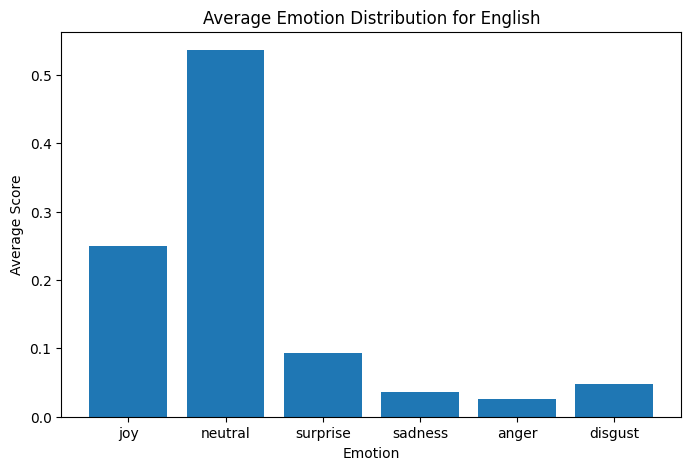

Analyzing language: French...
Computing synonym density...


<ipython-input-23-98e52374d18e>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_df['emotion_embeddings'] = lang_df['emotion_scores'].apply(extract_embeddings)


French: Synonym Density: 0.7651920914649963


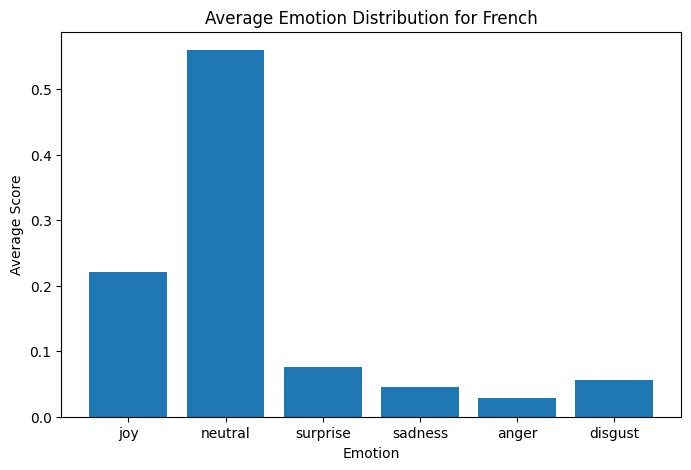

Analyzing language: Italian...
Computing synonym density...


<ipython-input-23-98e52374d18e>:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_df['emotion_embeddings'] = lang_df['emotion_scores'].apply(extract_embeddings)


Italian: Synonym Density: 0.7698471546173096


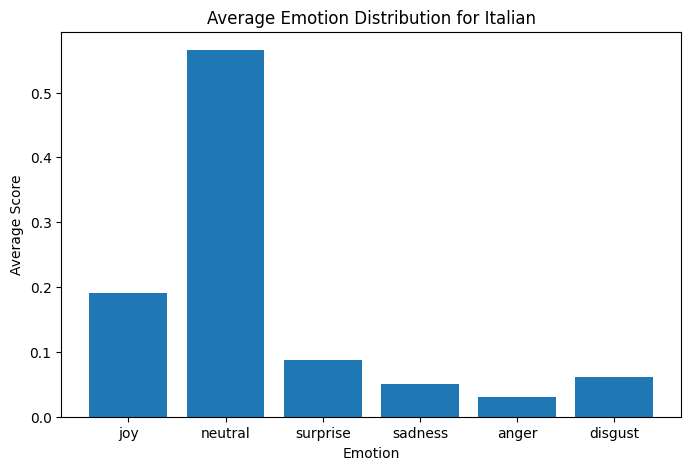

Comparing languages...


<Figure size 1000x600 with 0 Axes>

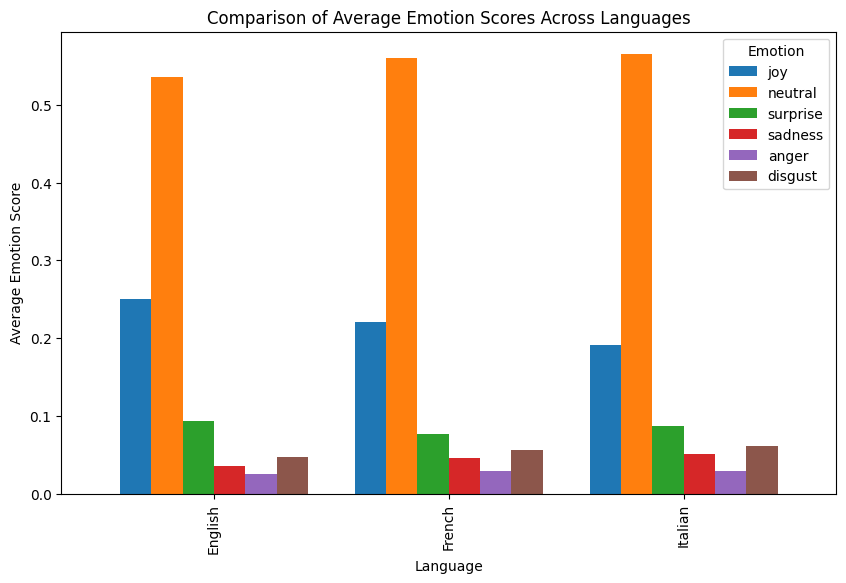

Analyzing correlation between emotions and review scores...
High scores (4-5): Average Emotion Scores: [0.18464036 0.46796805 0.08750971 0.04643753 0.03917827 0.0401646 ]


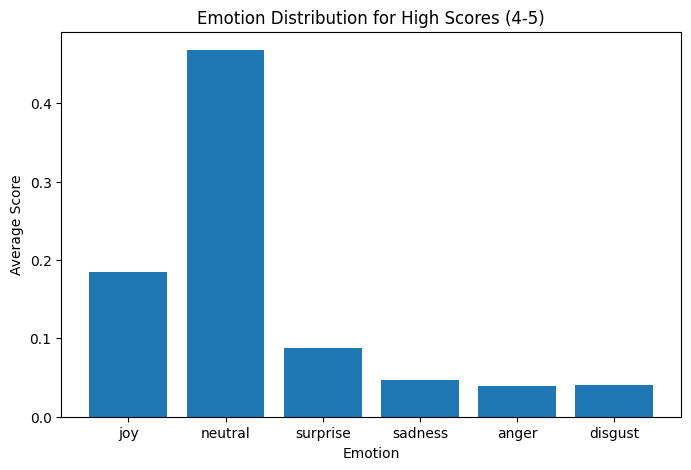

Low scores (0-2): Average Emotion Scores: [0.07802243 0.48369182 0.07588197 0.11318098 0.08404687 0.04215691]


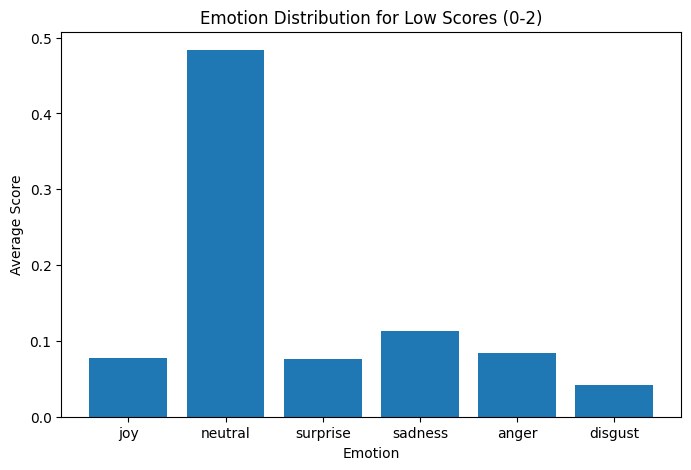

Performing t-SNE visualization...


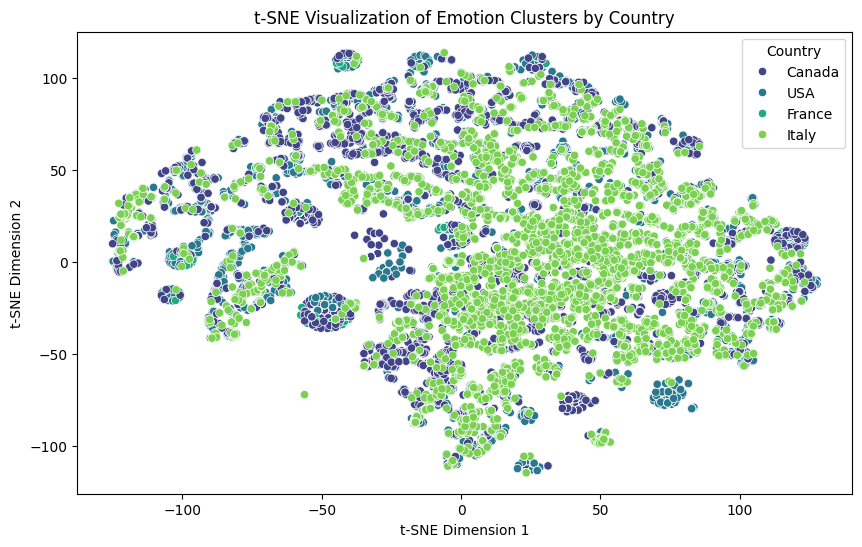

Performing cross-linguistic clustering...


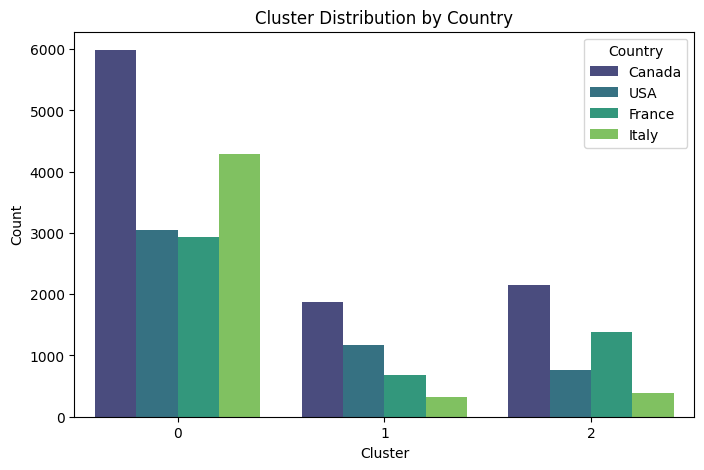

Performing hierarchical clustering...


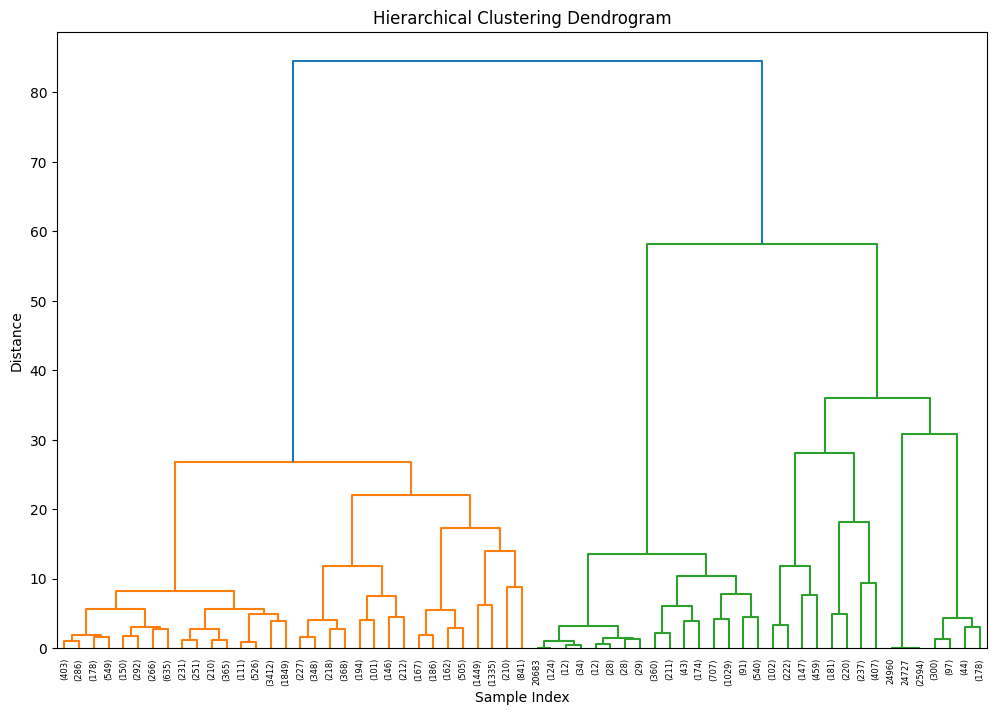

Saving processed dataset...
Dataset saved successfully.


In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModel, pipeline
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage

# load preprocessed data (English, French, Italian)
print("Loading dataset...")
df = pd.concat([
    en_df[['review_content', 'cleaned_english', 'country', 'score']].rename(columns={'cleaned_english': 'cleaned_review'}),
    fr_df[['review_content', 'cleaned_french', 'country', 'score']].rename(columns={'cleaned_french': 'cleaned_review'}),
    it_df[['review_content', 'cleaned_italian', 'country', 'score']].rename(columns={'cleaned_italian': 'cleaned_review'})
], axis=0)
df['review_content'] = df['cleaned_review']
df.drop(columns=['cleaned_review'], inplace=True)

# embedding model for synonym density computation
print("Loading embedding model...")
embedding_model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
embedding_model = AutoModel.from_pretrained(embedding_model_name).to("cuda:0")

# emotion analysis model
print("Loading emotion model...")
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
emotion_tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
emotion_model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
emotion_classifier = pipeline("text-classification", model=emotion_model, tokenizer=emotion_tokenizer, top_k=None, device=0)

# analyze emotions
print("Analyzing emotions...")
def analyze_emotions(text):
    try:
        if pd.isnull(text) or text.strip() == "":
            return {}
        predictions = emotion_classifier(text)
        return {p['label']: p['score'] for p in predictions[0]}
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return {}

df['emotion_scores'] = df['review_content'].apply(analyze_emotions)

# extract emotion embeddings
def extract_embeddings(emotion_scores):
    try:
        return np.array([emotion_scores.get('joy', 0),
                         emotion_scores.get('neutral', 0),
                         emotion_scores.get('surprise', 0),
                         emotion_scores.get('sadness', 0),
                         emotion_scores.get('anger', 0),
                         emotion_scores.get('disgust', 0)])
    except Exception as e:
        print(f"Error extracting embeddings: {emotion_scores}. Error: {e}")
        return np.zeros(6)

df['emotion_embeddings'] = df['emotion_scores'].apply(extract_embeddings)

# normalize embeddings for consistency
emotion_embeddings = np.vstack(df['emotion_embeddings'].values)
emotion_embeddings = normalize(emotion_embeddings)

# compute synonym density
def compute_synonym_density(lang_df):
    print("Computing synonym density...")
    emotion_terms = [
        word for sublist in lang_df['review_content'].apply(lambda x: x.split() if x else []).tolist()
        for word in sublist
    ]
    batch_size = 32
    embeddings = []
    for i in range(0, len(emotion_terms), batch_size):
        batch = emotion_terms[i:i+batch_size]
        try:
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to("cuda:0")
            outputs = embedding_model(**inputs)
            embeddings.extend(outputs.last_hidden_state.mean(dim=1).detach().cpu().numpy())
        except Exception as e:
            print(f"Error processing batch: {batch}. Error: {e}")
            continue
    if not embeddings:
        print("No valid embeddings for synonym density computation.")
        return 0
    embeddings = np.array(embeddings)
    pairwise_similarities = cosine_similarity(embeddings)
    return np.mean(pairwise_similarities[np.triu_indices_from(pairwise_similarities, k=1)])

def analyze_language(lang, lang_df):
    print(f"Analyzing language: {lang}...")
    if lang_df.empty:
        print(f"No data available for {lang}. Skipping analysis.")
        return np.zeros(6), 0

    lang_df['emotion_embeddings'] = lang_df['emotion_scores'].apply(extract_embeddings)
    if lang_df['emotion_embeddings'].apply(len).sum() == 0:
        print(f"No valid emotion embeddings for {lang}. Skipping analysis.")
        return np.zeros(6), 0

    avg_emotion_scores = np.mean(np.vstack(lang_df['emotion_embeddings'].values), axis=0)

    # actually compute syn density
    synonym_density = compute_synonym_density(lang_df)
    print(f"{lang}: Synonym Density: {synonym_density}")

    # plot emotion distribution for the language
    plt.figure(figsize=(8, 5))
    plt.bar(['joy', 'neutral', 'surprise', 'sadness', 'anger', 'disgust'], avg_emotion_scores)
    plt.title(f"Average Emotion Distribution for {lang}")
    plt.xlabel("Emotion")
    plt.ylabel("Average Score")
    plt.show()

    return avg_emotion_scores, synonym_density

# language-specific analysis
languages = ['English', 'French', 'Italian']
lang_column_mapping = {'English': en_df, 'French': fr_df, 'Italian': it_df}

language_emotion_averages = {}

for lang, lang_df in lang_column_mapping.items():
    lang_data = df[df['review_content'].notna() & df['review_content'].isin(lang_df['review_content'])]
    language_emotion_averages[lang] = analyze_language(lang, lang_data)

# compare languages
print("Comparing languages...")
avg_scores_df = pd.DataFrame.from_dict(
    {lang: data[0] for lang, data in language_emotion_averages.items()},
    orient='index', columns=['joy', 'neutral', 'surprise', 'sadness', 'anger', 'disgust'])

plt.figure(figsize=(10, 6))
avg_scores_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Comparison of Average Emotion Scores Across Languages")
plt.xlabel("Language")
plt.ylabel("Average Emotion Score")
plt.legend(title="Emotion")
plt.show()

# emotional rating analysis
def analyze_emotional_ratings():
    print("Analyzing correlation between emotions and review scores...")
    score_thresholds = {
        'high': (4, 5),  # Scores 4 and above
        'low': (0, 2)   # Scores 2 and below
    }

    for threshold, (low, high) in score_thresholds.items():
        filtered_df = df[df['score'].between(low, high)]
        avg_emotions = np.mean(np.vstack(filtered_df['emotion_embeddings'].values), axis=0)
        print(f"{threshold.capitalize()} scores ({low}-{high}): Average Emotion Scores: {avg_emotions}")

        plt.figure(figsize=(8, 5))
        plt.bar(['joy', 'neutral', 'surprise', 'sadness', 'anger', 'disgust'], avg_emotions)
        plt.title(f"Emotion Distribution for {threshold.capitalize()} Scores ({low}-{high})")
        plt.xlabel("Emotion")
        plt.ylabel("Average Score")
        plt.show()

analyze_emotional_ratings()

def tsne_visualization():
    print("Performing t-SNE visualization...")
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(emotion_embeddings)
    df['tsne_x'] = tsne_results[:, 0]
    df['tsne_y'] = tsne_results[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='tsne_x', y='tsne_y', hue='country', data=df, palette='viridis')
    plt.title("t-SNE Visualization of Emotion Clusters by Country")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(title="Country")
    plt.show()

tsne_visualization()

def cross_linguistic_clustering():
    print("Performing cross-linguistic clustering...")
    kmeans = KMeans(n_clusters=3, random_state=42)
    df['cluster'] = kmeans.fit_predict(emotion_embeddings)

    plt.figure(figsize=(8, 5))
    sns.countplot(x='cluster', hue='country', data=df, palette='viridis')
    plt.title("Cluster Distribution by Country")
    plt.xlabel("Cluster")
    plt.ylabel("Count")
    plt.legend(title="Country")
    plt.show()

cross_linguistic_clustering()

def hierarchical_clustering():
    print("Performing hierarchical clustering...")
    linkage_matrix = linkage(emotion_embeddings, method='ward')
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.show()

hierarchical_clustering()

# save processed results
print("Saving processed dataset...")
df.to_csv("processed_reviews_language_analysis.csv", index=False)
print("Dataset saved successfully.")


#### MISC / Country TSNE and addditional Heatmap



In [ ]:
# Data Loading
# Step 1: Load Data
import pandas as pd

# Load the dataset from the specified Excel file
print("Loading dataset from data.xlsx...")
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
print("Dataset loaded successfully. Columns:")
print(df.columns)

# Verify if 'review_content' column exists
if 'review_content' not in df.columns:
    raise KeyError("The column 'review_content' is not found in the dataset. Available columns: " + ", ".join(df.columns))

print("Dataset preview:")
print(df.head())

df.to_pickle("data_loaded.pkl")  # Save the DataFrame for the next step
print("Dataset saved for the next step.")


Loading dataset from data.xlsx...
Dataset loaded successfully. Columns:
Index(['reviewId', 'review_content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'country', 'Language'],
      dtype='object')
Dataset preview:
                               reviewId  \
0  f7b53a86-a02a-4dcc-b03e-5d16c3436ce8   
1  c422fc8c-2398-41e7-bcf2-6a782de21138   
2  dc84000f-78d5-4952-ab37-9d995153bc50   
3  14c43882-3276-4fb4-b210-2e6fd7cb64f1   
4  990283d2-f675-4089-9198-b9d33c7819fe   

                                      review_content  score  thumbsUpCount  \
0                                              great      5              0   
1                                      excellent app      4              0   
2  The best app I ever seen in my life he solve m...      5              0   
3                                            Great 🥰      5              0   
4                                             nice 👍      5       

In [ ]:
# Multlingual Emotion Analysis

# Step 2: Multilingual Emotion Analysis using XLM-RoBERTa
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the previously saved data
df = pd.read_pickle("data_loaded.pkl")
print("Dataset loaded for emotion analysis.")

print("Loading XLM-RoBERTa model...")
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, top_k=None, device=0)

# Analyze emotions in reviews
def analyze_emotions(text):
    try:
        print(f"Analyzing text: {text}")
        predictions = classifier(text)
        print(f"Predictions: {predictions}")
        return {p['label']: p['score'] for p in predictions[0]}
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return {}

print("Analyzing emotions in reviews...")
df['emotion_scores'] = df['review_content'].apply(analyze_emotions)  # Apply to review content
print("Emotion analysis completed. Preview:")
print(df[['review_content', 'emotion_scores']].head())

df.to_pickle("emotion_scores.pkl")  # Save the DataFrame for the next step
print("Emotion scores saved for the next step.")


Dataset loaded for emotion analysis.
Loading XLM-RoBERTa model...
Analyzing emotions in reviews...
Analyzing text: great
Predictions: [[{'label': 'joy', 'score': 0.6147449612617493}, {'label': 'neutral', 'score': 0.23312118649482727}, {'label': 'surprise', 'score': 0.05679108202457428}, {'label': 'sadness', 'score': 0.035396333783864975}, {'label': 'anger', 'score': 0.034524306654930115}, {'label': 'disgust', 'score': 0.012961347587406635}, {'label': 'fear', 'score': 0.012460741214454174}]]
Analyzing text: excellent app
Predictions: [[{'label': 'joy', 'score': 0.874015748500824}, {'label': 'neutral', 'score': 0.10410710424184799}, {'label': 'surprise', 'score': 0.011141642928123474}, {'label': 'sadness', 'score': 0.00453071529045701}, {'label': 'disgust', 'score': 0.0030319751240313053}, {'label': 'anger', 'score': 0.002304773312062025}, {'label': 'fear', 'score': 0.000868055853061378}]]
Analyzing text: The best app I ever seen in my life he solve my problem in 1 second
Predictions: [[

Token indices sequence length is longer than the specified maximum sequence length for this model (709 > 512). Running this sequence through the model will result in indexing errors


Streaming output truncated to the last 5000 lines.
Predictions: [[{'label': 'neutral', 'score': 0.9328961968421936}, {'label': 'surprise', 'score': 0.03940880298614502}, {'label': 'sadness', 'score': 0.013387029990553856}, {'label': 'anger', 'score': 0.0050596133805811405}, {'label': 'joy', 'score': 0.004830375779420137}, {'label': 'disgust', 'score': 0.002465356606990099}, {'label': 'fear', 'score': 0.001952718012034893}]]
Analyzing text: Très cool
Predictions: [[{'label': 'joy', 'score': 0.5246034860610962}, {'label': 'neutral', 'score': 0.40320563316345215}, {'label': 'disgust', 'score': 0.03526076674461365}, {'label': 'anger', 'score': 0.013186882250010967}, {'label': 'surprise', 'score': 0.012206128798425198}, {'label': 'sadness', 'score': 0.009690484963357449}, {'label': 'fear', 'score': 0.0018466277979314327}]]
Analyzing text: 😎😎😎💜💜💚🗣💙😝
Predictions: [[{'label': 'neutral', 'score': 0.8047863841056824}, {'label': 'anger', 'score': 0.06364301592111588}, {'label': 'joy', 'score': 0.

In [ ]:
# Step 3: Emotion Lexicon Tagging
import pandas as pd

# Load the previously saved data
df = pd.read_pickle("emotion_scores.pkl")
print("Dataset loaded for emotion tagging.")

print("Loading EmoLex or LIWC for emotion tagging...")
# Dummy implementation: Replace with actual lexicon logic or library
emotion_lexicon = {
    "happy": "joy",
    "great": "joy",
    "sad": "sadness",
    "terrible": "anger",
    # Extend with more words and emotions
}

def tag_with_lexicon(text):
    print(f"Tagging emotions in text: {text}")
    words = str(text).split()
    tagged_emotions = [emotion_lexicon.get(word, "") for word in words]
    print(f"Tagged emotions: {tagged_emotions}")
    return [tag for tag in tagged_emotions if tag]

print("Tagging emotions using lexicon...")
df['tagged_emotions'] = df['review_content'].apply(tag_with_lexicon)
print("Emotion tagging completed. Preview:")
print(df[['review_content', 'tagged_emotions']].head())

df.to_pickle("tagged_emotions.pkl")  # Save the DataFrame for the next step
print("Tagged emotions saved for the next step.")


Streaming output truncated to the last 5000 lines.
Tagging emotions in text: L'application nous aide vraiment merci
Tagged emotions: ['', '', '', '', '']
Tagging emotions in text: elle est plus mieux que tout iz
Tagged emotions: ['', '', '', '', '', '', '']
Tagging emotions in text: c'est génial d'avoir ChatGPT être conseiller personnel
Tagged emotions: ['', '', '', '', '', '', '']
Tagging emotions in text: bon application
Tagged emotions: ['', '']
Tagging emotions in text: Très cool
Tagged emotions: ['', '']
Tagging emotions in text: 😎😎😎💜💜💚🗣💙😝
Tagged emotions: ['']
Tagging emotions in text: ❤️❤️
Tagged emotions: ['']
Tagging emotions in text: Chat gbt >>>>> Google
Tagged emotions: ['', '', '', '']
Tagging emotions in text: très bien
Tagged emotions: ['', '']
Tagging emotions in text: C'est une bonne app
Tagged emotions: ['', '', '', '']
Tagging emotions in text: marsi
Tagged emotions: ['']
Tagging emotions in text: pas mal comme apk 4 étoiles juste parce qu'elle ne conserve pas les di

Dataset loaded for clustering and visualization.
Performing synonym density analysis...
Clustering emotion embeddings...
Clustering completed. Preview:
                                      review_content  cluster
0                                              great        3
1                                      excellent app        1
2  The best app I ever seen in my life he solve m...        2
3                                            Great 🥰        1
4                                             nice 👍        3
Performing t-SNE for visualization...


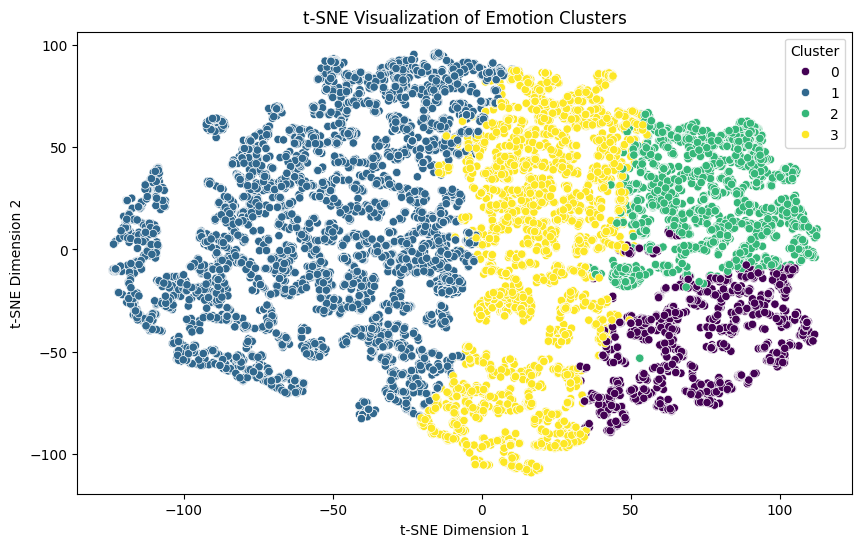

Clustered data saved for the next step.


In [ ]:
# Step 4: Synonym Density and Clustering Analysis + Visualization
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns

# Load the previously saved data
df = pd.read_pickle("tagged_emotions.pkl")
print("Dataset loaded for clustering and visualization.")

print("Performing synonym density analysis...")
def extract_embeddings(emotion_scores):
    try:
        embedding = np.array(list(emotion_scores.values()))
        if len(embedding) < 6:
            embedding = np.pad(embedding, (0, 6 - len(embedding)))  # Pad with zeros if too short
        elif len(embedding) > 6:
            embedding = embedding[:6]  # Truncate if too long
        return embedding
    except Exception as e:
        print(f"Error extracting embeddings: {emotion_scores}. Error: {e}")
        return np.zeros(6)  # Default to zero vector if something goes wrong

df['emotion_embeddings'] = df['emotion_scores'].apply(extract_embeddings)

# Normalize embeddings for clustering
embeddings_matrix = np.vstack(df['emotion_embeddings'].values)
embeddings_matrix = normalize(embeddings_matrix)

# Clustering using KMeans
print("Clustering emotion embeddings...")
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
df['cluster'] = kmeans.fit_predict(embeddings_matrix)
print("Clustering completed. Preview:")
print(df[['review_content', 'cluster']].head())

# t-SNE Visualization
print("Performing t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings_matrix)
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=df, palette='viridis')
plt.title("t-SNE Visualization of Emotion Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()

df.to_pickle("clustered_data.pkl")  # Save the DataFrame for the next step
print("Clustered data saved for the next step.")


Heatmap and Clustering Below

In [ ]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
import gdown

In [ ]:
# Step 1: Load Data


# Google Drive link for the data
file_id = "1EC5UlhpUMTFqCY5nYd12RQ1x2izDJb_S"  # Extracted from the link
output_file = "data.xlsx"

# Download the file from Google Drive
print("Downloading dataset from Google Drive...")
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)
print(f"Dataset downloaded as {output_file}.")

# Load the Excel file into a DataFrame
print("Loading dataset into a DataFrame...")
df = pd.read_excel(output_file, sheet_name="Sheet1")
print("Dataset loaded successfully. Columns:")
print(df.columns)

# Verify if 'review_content' column exists
if 'review_content' not in df.columns:
    raise KeyError("The column 'review_content' is not found in the dataset. Available columns: " + ", ".join(df.columns))

print("Dataset preview:")
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1EC5UlhpUMTFqCY5nYd12RQ1x2izDJb_S
To: /content/data.xlsx
100%|██████████| 2.08M/2.08M [00:00<00:00, 51.4MB/s]


Dataset downloaded as data.xlsx.
Loading dataset into a DataFrame...
Dataset loaded successfully. Columns:
Index(['reviewId', 'review_content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'country', 'Language'],
      dtype='object')
Dataset preview:
                               reviewId  \
0  f7b53a86-a02a-4dcc-b03e-5d16c3436ce8   
1  c422fc8c-2398-41e7-bcf2-6a782de21138   
2  dc84000f-78d5-4952-ab37-9d995153bc50   
3  14c43882-3276-4fb4-b210-2e6fd7cb64f1   
4  990283d2-f675-4089-9198-b9d33c7819fe   

                                      review_content  score  thumbsUpCount  \
0                                              great      5              0   
1                                      excellent app      4              0   
2  The best app I ever seen in my life he solve m...      5              0   
3                                            Great 🥰      5              0   
4                              

In [ ]:

# Step 2: Multilingual Emotion Analysis using XLM-RoBERTa
print("Loading XLM-RoBERTa model...")
emotion_model_name = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(emotion_model_name)
model = AutoModelForSequenceClassification.from_pretrained(emotion_model_name)
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, top_k=None, device=0)

# Analyze emotions in reviews
def analyze_emotions(text):
    try:
        predictions = classifier(text)
        return {p['label']: p['score'] for p in predictions[0]}
    except Exception as e:
        print(f"Error processing text: {text}. Error: {e}")
        return {}

print("Analyzing emotions in reviews...")
df['emotion_scores'] = df['review_content'].apply(analyze_emotions)  # Apply to review content
print("Emotion analysis completed. Preview:")
print(df[['review_content', 'emotion_scores']].head())


Loading XLM-RoBERTa model...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

Analyzing emotions in reviews...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
Token indices sequence length is longer than the specified maximum sequence length for this model (709 > 512). Running this sequence through the model will result in indexing errors


Error processing text: আব্বাস রা. থেকে বর্ণিত, তিনি বলেন, উত্তরাধিকারী হিসেবে সম্পদ পেত সন্তান আর পিতা-মাতার জন্য ছিল অসীয়াত । এরপর আল্লাহ তা’আলা তাঁর পছন্দ মোতাবেক এ বিধান রহিত করে ছেলের অংশ মেয়ের দ্বিগুণ, পিতামাতা প্রত্যেকের জন্য এক ষষ্ঠমাংশ, স্ত্রীর জন্য (যদি সন্তান থাকে) এক অষ্টমাংশ, (না থাকলে) এক চতুর্থাংশ, স্বামীর জন্য (সন্তান না থাকলে) অর্ধেক, (থাকলে) এক চতুর্থাংশ নির্ধারণ করেন।. Error: The expanded size of the tensor (709) must match the existing size (514) at non-singleton dimension 1.  Target sizes: [1, 709].  Tensor sizes: [1, 514]
Error processing text: यह एक बहुत ही दिलचस्प प्लेटफार्म है। जो कि इस प्लेटफार्म से अपने जीवन में कुछ हमने एक नया हासिल किया और हमारे जिंदगी बदल गई इस प्लेटफार्म से। इस प्लेटफार्म के ऑनर से मैं यही गुजारिश करूंगा। कि इस प्लेटफार्म को हमेशा के लिए एलिजिबल रहने दे और इस प्लेटफार्म को और बेहतर करें। अपने ai ChatGPT को और बेहतर करें जो की आने वाले समय में, हर देशवासियों का, हर एक इंसान का मदद होगा और हर एक इंसान का एलियंस की तरह दिमाग काम करेगा। मैं 

In [ ]:

# Step 3: Emotion Lexicon Tagging
print("Loading EmoLex or LIWC for emotion tagging...")
# Dummy implementation: Replace with actual lexicon logic or library
emotion_lexicon = {
    "happy": "joy",
    "great": "joy",
    "sad": "sadness",
    "terrible": "anger",
    # Extend with more words and emotions
}

def tag_with_lexicon(text):
    words = str(text).split()
    return [emotion_lexicon.get(word, "") for word in words if emotion_lexicon.get(word, "")]

print("Tagging emotions using lexicon...")
df['tagged_emotions'] = df['review_content'].apply(tag_with_lexicon)
print("Emotion tagging completed. Preview:")
print(df[['review_content', 'tagged_emotions']].head())


Performing synonym density analysis...
Clustering emotion embeddings...
Clustering completed. Preview:
                                      review_content  cluster
0                                              great        3
1                                      excellent app        1
2  The best app I ever seen in my life he solve m...        2
3                                            Great 🥰        1
4                                             nice 👍        3
Performing hierarchical clustering...


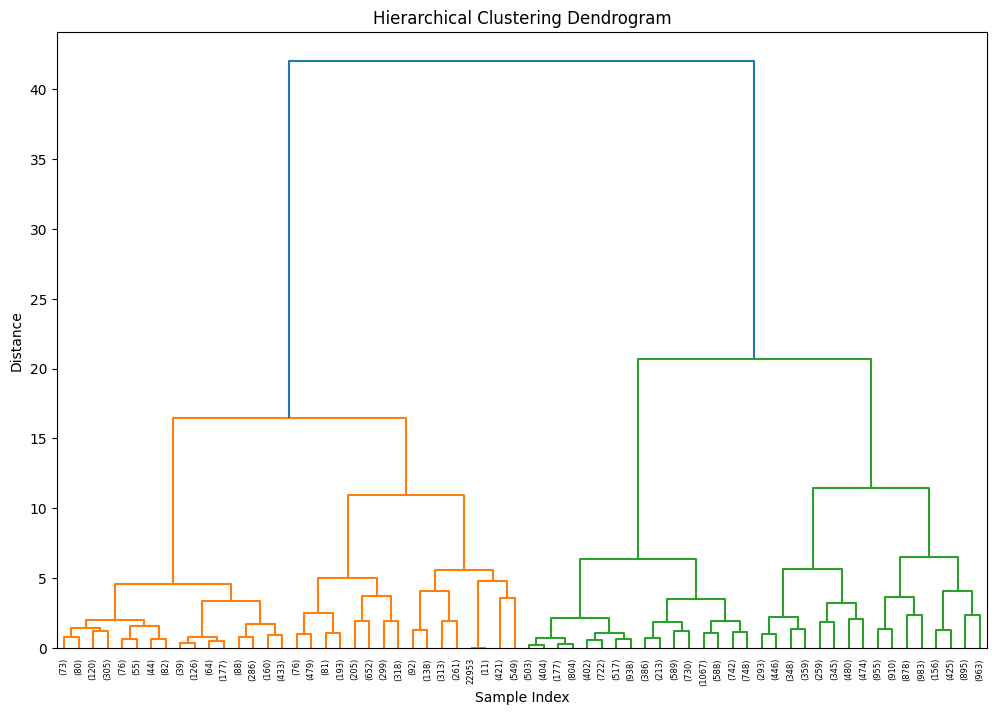

Performing t-SNE for visualization...


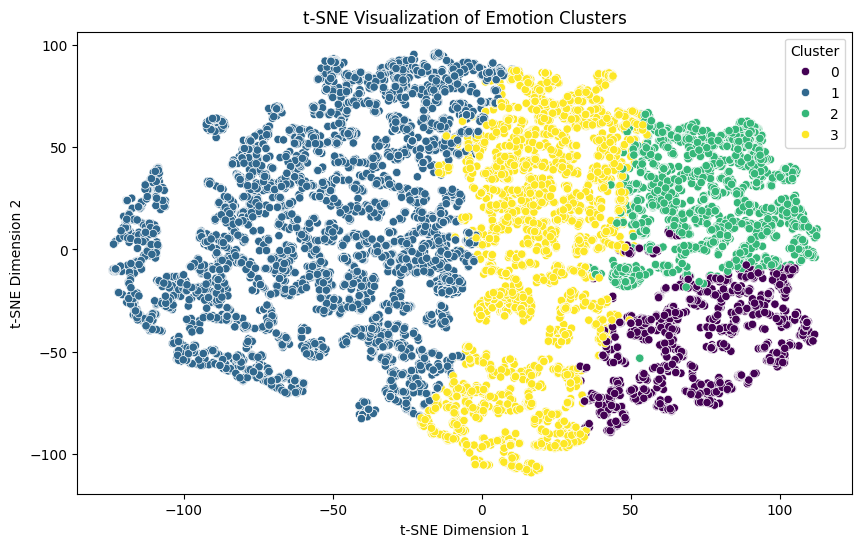

Calculating cluster statistics and synonym density...
Cluster 0: Average Emotion Scores: [0.50364552 0.35711385 0.06707287 0.03332412 0.02020336 0.01230311]
Cluster 0: Example Reviews: ['دا یوه داسې برنامه ده چې ددی دلاری کولای شو په نړی کې د هرڅه په اړه سوالونه سرچ کړو او جواب یی پیداکړو زه یی 100% تایئد کوم او خوشحاله یم چې داسې برنامی جوړیږي. لااله الله محمدالرسول الله', 'good 👍', 'amazing, I use it more often👍👍']
Cluster 1: Average Emotion Scores: [0.82490103 0.0761351  0.0387229  0.02473717 0.01719811 0.01169007]
Cluster 1: Example Reviews: ['excellent app', 'Great 🥰', 'অনেক ভালো']
Cluster 2: Average Emotion Scores: [0.38478032 0.24185961 0.17388411 0.09359507 0.05641268 0.03132385]
Cluster 2: Example Reviews: ['The best app I ever seen in my life he solve my problem in 1 second', 'احلي تطبيق ممكن اتخيله بيساعد في اي حاجه شكرا جدا ليكم يا صناع مبرمجين التطبيق', 'التطبيق ممتاز و خصوصًا في الرد بطريقة أقرب للطبيعي و لكن بعد آخر تحديث أصبح لا يفهم اللغة العربية بشكل سهل و يتكلم بطريق

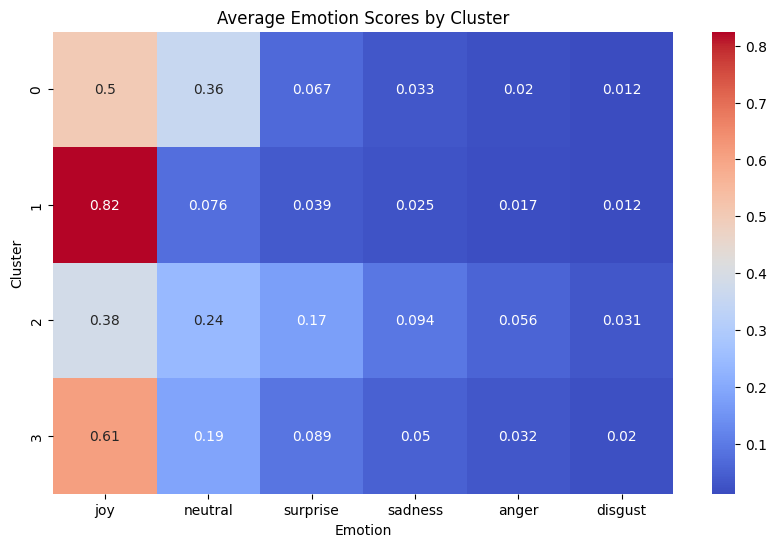

Saving processed dataset to processed_reviews.csv...
Dataset saved successfully.


In [ ]:

# Step 4: Synonym Density and Clustering Analysis
print("Performing synonym density analysis...")
def extract_embeddings(emotion_scores):
    try:
        embedding = np.array(list(emotion_scores.values()))
        if len(embedding) < 6:
            embedding = np.pad(embedding, (0, 6 - len(embedding)))  # Pad with zeros if too short
        elif len(embedding) > 6:
            embedding = embedding[:6]  # Truncate if too long
        return embedding
    except Exception as e:
        print(f"Error extracting embeddings: {emotion_scores}. Error: {e}")
        return np.zeros(6)  # Default to zero vector if something goes wrong

df['emotion_embeddings'] = df['emotion_scores'].apply(extract_embeddings)
embeddings_matrix = np.vstack(df['emotion_embeddings'].values)
embeddings_matrix = normalize(embeddings_matrix)  # Normalize embeddings for clustering

# Clustering using KMeans
print("Clustering emotion embeddings...")
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters as needed
df['cluster'] = kmeans.fit_predict(embeddings_matrix)
print("Clustering completed. Preview:")
print(df[['review_content', 'cluster']].head())

# Hierarchical Clustering
print("Performing hierarchical clustering...")
linkage_matrix = linkage(embeddings_matrix, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# t-SNE Visualization
print("Performing t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(embeddings_matrix)
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=df, palette='viridis')
plt.title("t-SNE Visualization of Emotion Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend(title="Cluster")
plt.show()

# Cluster Statistics and Synonym Density
print("Calculating cluster statistics and synonym density...")
for cluster_id in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster_id]
    avg_emotion_scores = np.mean(np.vstack(cluster_data['emotion_embeddings'].values), axis=0)
    print(f"Cluster {cluster_id}: Average Emotion Scores: {avg_emotion_scores}")
    print(f"Cluster {cluster_id}: Example Reviews: {cluster_data['review_content'].head(3).tolist()}")

# Heatmap of Average Emotion Scores
print("Generating heatmap of average emotion scores across clusters...")
cluster_avg_scores = [np.mean(np.vstack(df[df['cluster'] == i]['emotion_embeddings'].values), axis=0) for i in sorted(df['cluster'].unique())]
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_avg_scores, annot=True, cmap='coolwarm', xticklabels=['joy', 'neutral', 'surprise', 'sadness', 'anger', 'disgust'])
plt.title("Average Emotion Scores by Cluster")
plt.xlabel("Emotion")
plt.ylabel("Cluster")
plt.show()

# Save processed DataFrame for further use
print("Saving processed dataset to processed_reviews.csv...")
df.to_csv("processed_reviews.csv", index=False)
print("Dataset saved successfully.")
